**AGUNG AJI SAPUTRA**

**1103202114**

**CLUSTERING**

**survey lung cancer csv**

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

**K-Means adalah salah satu algoritma clustering/pengelompokan untuk menganalisa data dengan cara melakukan pemodelan terhadap data yang memiliki karakteristik yang sama**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#PROMT = buatkan saya kode untuk menghubungkan dari google drive ke google collab

# **EDA**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/UTS ML/survey lung cancer.csv')

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#menampilkan 5 baris pertama dari data set

EDA EDA atau Exploratory Data Analysis merupakan tahap penting dalam proses analisis data,
Tujuan utama dari EDA adalah menganalisis dan memahami struktur serta karakteristik data sebelum menerapkan teknik statistik atau machine learning yang lebih kompleks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#PROMT berikan kode untuk menampilkan info dari data set

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.drop(['ANXIETY', 'PEER_PRESSURE'], axis=1, inplace=True)
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  CHRONIC DISEASE  FATIGUE   ALLERGY   \
0      M   69        1               2                1         2         1   
1      M   74        2               1                2         2         2   
2      F   59        1               1                1         2         1   
3      M   63        2               2                1         1         1   
4      F   63        1               2                1         1         1   

   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  \
0         2                  2         2                    2   
1         1                  1         1                    2   
2         2                  1         2                    2   
3         1                  2         1                    1   
4         2                  1         2                    2   

   SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                      2           2         YES  
1                      2        

# **DATA VISUALIZATION**
Data visualization dalam K-Means Clustering adalah suatu pendekatan untuk secara visual memahami hasil klastering data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

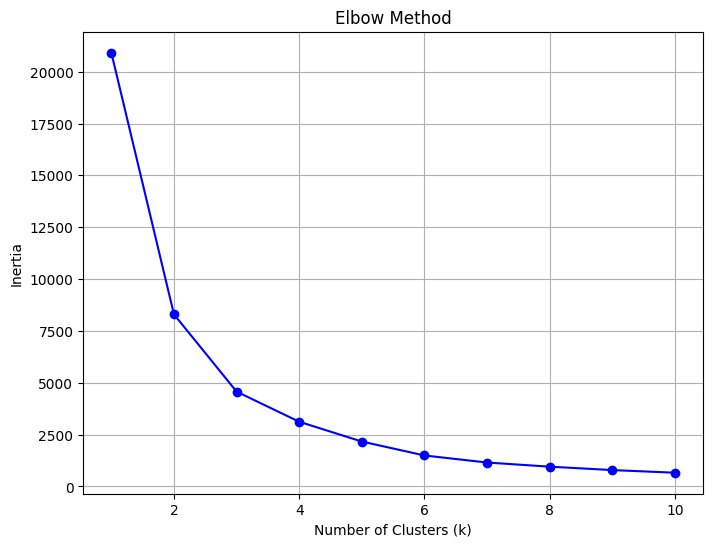

In [ ]:
data = df[['AGE', 'SMOKING', 'YELLOW_FINGERS']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


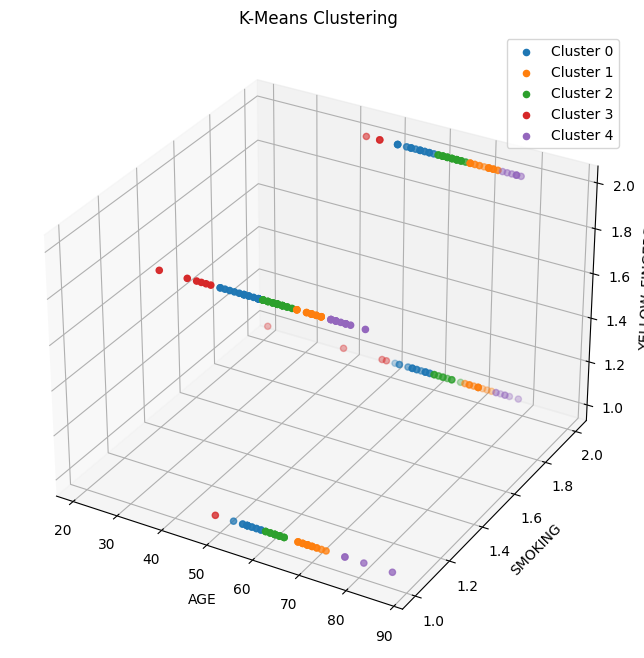

In [ ]:
attributes = df[['AGE', 'SMOKING', 'YELLOW_FINGERS']]
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(attributes)
df['label'] = labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(n_clusters):
    cluster = df[df['label'] == label]
    ax.scatter(cluster['AGE'], cluster['SMOKING'], cluster['YELLOW_FINGERS'], label=f'Cluster {label}')

ax.set_xlabel('AGE')
ax.set_ylabel('SMOKING')
ax.set_zlabel('YELLOW_FINGERS')
ax.set_title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
#PROMT = buatkan lah kode untuk menampilkan k means clustering

# **TRAINING**

In [ ]:
# Install library yang dibutuhkan
!pip install -q pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = 'survey lung cancer.csv'
df = pd.read_csv(file_path)

In [ ]:
#MEMILI FITUR UNTUK MELAKUKAN KLUSTERING
features = df[['AGE', 'SMOKING', 'YELLOW_FINGERS']]

In [ ]:
# Standardisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
#menentukan jumlah cluster
n_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

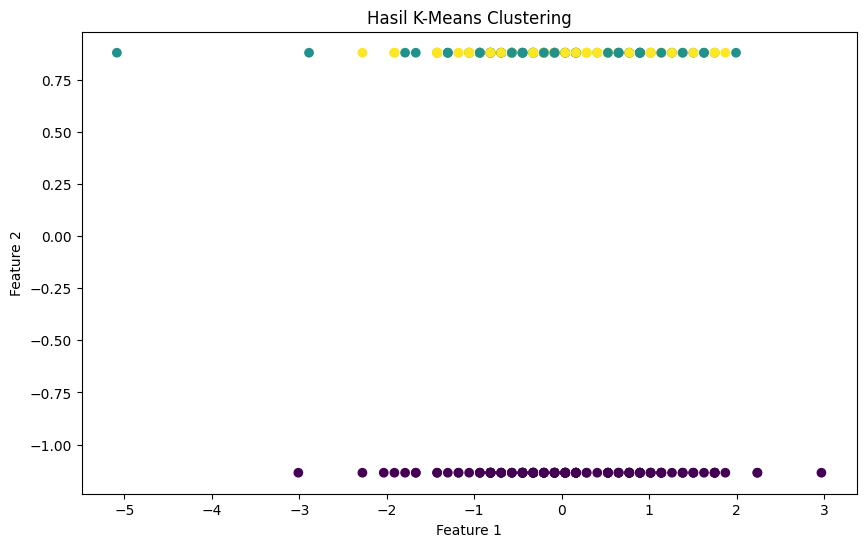

In [ ]:
df['cluster_label'] = kmeans.labels_

# Tampilkan hasil klastering
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['cluster_label'], cmap='viridis')
plt.title('Hasil K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
#PROMT =buatkan  kode untuk training dataset dengan k means clustering di google collab

EVALUATION

In [ ]:
# Install library yang dibutuhkan
!pip install -q pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
file_path = 'survey lung cancer.csv'
df = pd.read_csv(file_path)

In [ ]:
# Pilih fitur yang akan digunakan untuk klastering
features = df[['AGE', 'SMOKING', 'YELLOW_FINGERS']]

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# MENENTUKAN jumlah klaster (n_clusters)
n_clusters = 3

In [ ]:
# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)

# Tambahkan label klaster ke dataset
df['cluster_label'] = kmeans.labels_

# Evaluasi menggunakan Silhouette Score
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.43188853331869864


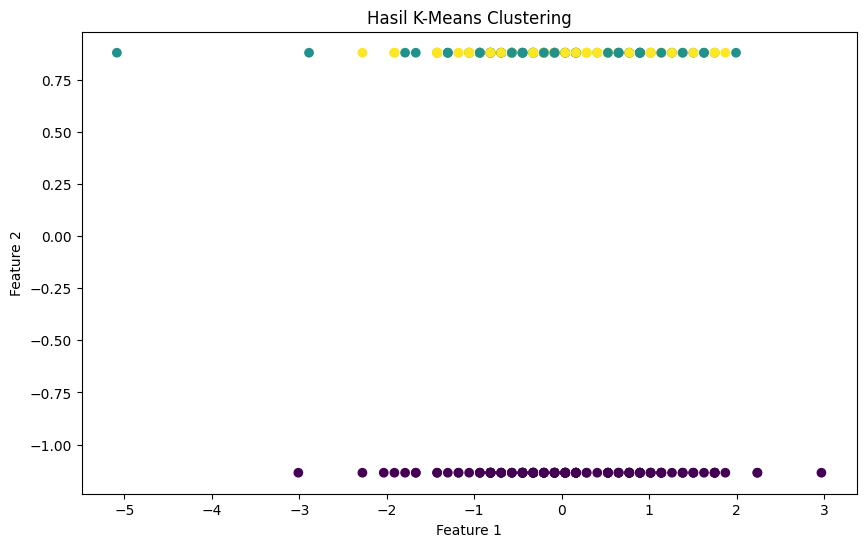

In [ ]:
# Visualisasi hasil klastering
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['cluster_label'], cmap='viridis')
plt.title('Hasil K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
#PROMT = buatkan  kode untuk evaluation dataset dengan k means clustering di google collab

**NEW INPUT DATA SET**

In [1]:
import pandas as pd

# Membuat dataframe dengan kolom-kolom yang sesuai
data = {
    'AGE': [65],
    'SMOKING': [1],
    'YELLOW_FINGERS': [2],
    'ANXIETY': [1],
    'PEER_PRESSURE': [2],
    'CHRONIC DISEASE': [2],
    'FATIGUE': [1],
    'ALLERGY': [2],
    'WHEEZING': [2],
    'ALCOHOL CONSUMING': [1],
    'COUGHING': [1],
    'SHORTNESS OF BREATH': [2],
    'SWALLOWING DIFFICULTY': [1],
    'CHEST PAIN': [2]
}

new_data = pd.DataFrame(data)

print("Data Baru untuk Clustering K-means:")
print(new_data)

Data Baru untuk Clustering K-means:
   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0   65        1               2        1              2                2   

   FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        1        2         2                  1         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    2                      1           2  


In [ ]:
#PROMT = berikan saya kode untuk data input baru dari data set sebelumnya